In [5]:
import matplotlib.pyplot as plt
import seaborn
import requests
import json
import pandas as pd


In [6]:
def predict(sentence):
    url = "http://mazajak.inf.ed.ac.uk:8000/api/predict"
    to_sent = {'data': sentence}
    data = json.dumps(to_sent)
    headers = {'content-type': 'application/json'}
    # sending get request and saving the response as response object
    response = requests.post(url=url, data=data, headers=headers)
    
    if response.status_code == 200:
        prediction = json.loads(response.content)['data']
        
    else:
        prediction = "error"

    return prediction

In [7]:
# change the seeting of the cells to show the entire content of coulmn ( eexpand the size of coulmn)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [8]:
df = pd.read_csv('Matcha#DatasetCleaned.csv')

In [9]:
df['Class'] = df['Tweet'].apply(lambda x: predict(x))

In [10]:
df.head(20)

,Created at,User,Tweet,ID,Number of Retweets,Number of likes,Source,Location,Class
0,2022-10-09 15:56:27+00:00,SPStavrosAuthor,I try to drink matcha over coffee because it helps with anxiety problems instead of making them worse,1.580000e+18,0,0,Twitter for Android,Canada,neutral
1,2022-10-09 15:54:44+00:00,dellianarose,Height 5‚Äô3‚Äù Age 29 Shoe Size 8 or 9 depending on the shoe Zodiac Sign Sagittarius Tattoos 1 Piercings 2‚Ä¶,1.580000e+18,0,0,Twitter for iPhone,"Ottawa, Ontario",neutral
2,2022-10-09 15:36:25+00:00,DeeReads_,drink matcha and sin,1.580000e+18,0,1,Twitter Web App,NaN,neutral
3,2022-10-09 14:57:00+00:00,atasteofmadness,Easy Vanilla Matcha Chai Latte recipe This healthy warm comforting drink idea is vegan and gluten free perfect on‚Ä¶,1.580000e+18,1,0,Twitter Web App,"Chicago, IL",neutral
4,2022-10-09 14:21:21+00:00,ogidigest,did you drink your oatly matcha latte today,1.580000e+18,0,0,Twitter Web App,NaN,neutral
5,2022-10-09 13:55:48+00:00,maryam_a201,Id rather drink beer than drink matcha,1.580000e+18,0,0,Twitter for iPhone,"Rochester, NY",neutral
6,2022-10-09 13:28:29+00:00,fukuroumochi,5 tags 5 faves food SUKIYAKI üç≤ drink matcha latte üçµ color Seijoh color üíöü§ç is it mint green or turquoise b‚Ä¶,1.580000e+18,0,2,Twitter Web App,she/her ‚Ä¢ 25+,neutral
7,2022-10-09 13:02:19+00:00,fairyhrts,also i brought matcha cake but then they gave me lemon cake first they put no boba in my drink then‚Ä¶,1.580000e+18,0,1,Twitter Web App,any prns ‚ô° lesbian ‚òÜ‚òÖ\nÔπïminor 17 Ô∏µ scorpioÔπëüç∞ ‚ú¶,neutral
8,2022-10-09 12:12:33+00:00,iwttham,food risotto or anything with rice really drink matcha üçµ or mint black tea color yellow season mayjune when it‚Ä¶,1.580000e+18,0,1,Twitter for iPhone,ü§ç‚ù§Ô∏èü§ç,neutral
9,2022-10-09 12:09:42+00:00,zxhravita,My mum calls matcha ‚Äúthat green drink‚Äù üòÇ,1.580000e+18,0,1,Twitter for iPhone,NaN,neutral


In [11]:
# number of 'positive' tweet rows
countPositive = df['Class'].str.contains('positive', na=False).sum()
print(countPositive)

0


In [12]:
# number of 'Negative' tweet rows
countNegative = df['Class'].str.contains('negative', na=False).sum()
print(countNegative)

0


In [13]:
# number of 'Neutral' tweet rows
countNeutral = df['Class'].str.contains('neutral', na=False).sum()
print(countNeutral)

2836


# Descriptive

# Predictive

## Models preparation

In [14]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Display the tweet fully using:
pd.set_option('display.max_colwidth', None)
pd.set_option('max_colwidth', None)

In [15]:
#choose columns
fields = ['Tweet', 'Sentiment']
#read the two columns from the file and drop the null values
df = pd.read_csv('ClassifiedMatchDS.csv', skipinitialspace=True, usecols=fields).dropna()


In [16]:
# number of 'positive' tweet rows
countPositive = df['Sentiment'].str.contains('positive', na=False).sum()
print(countPositive)

1994


In [17]:
# number of 'Negative' tweet rows
countNegative = df['Sentiment'].str.contains('negative', na=False).sum()
print(countNegative)

200


In [18]:
# number of 'Neutral' tweet rows
countNeutral = df['Sentiment'].str.contains('neutral', na=False).sum()
print(countNeutral)

368


In [19]:
#remove neutral rows, they wouldn't help
df=df[df['Sentiment']!='neutral']

In [20]:
#change sentiment values to numeric 
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})

In [21]:
#identfy the tweets and the lables
tweets= df['Tweet']
lables= df['Sentiment']

In [22]:
#Convert textual data to numeric form
tf_vec=TfidfVectorizer()
x=tf_vec.fit_transform(tweets)
x.shape


(2194, 4652)

In [23]:

#Training phase
x_train,x_test, y_train, y_test= train_test_split(x, lables, test_size=0.3, shuffle=True, random_state=0)

print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(1535, 4652) (659, 4652) (1535,) (659,)


## Model#1 [Logistic Regression]

In [24]:
# build the logistic regression classifier
# use the training data to train the estimator
classifier_log = LogisticRegression().fit(x_train,y_train)


print("LogisticRegression accuracy: %.2f" % classifier_log.score(x_test, y_test))


LogisticRegression accuracy: 0.90


In [25]:
# Validation methods
#do a 10 fold cross-validation 
results_log = cross_val_score(classifier_log, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_log)

/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/num


10-fold cross-validation:
[0.90909091 0.90909091 0.90909091 0.90909091 0.9086758  0.9086758
 0.9086758  0.9086758  0.9086758  0.9086758 ]


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(



Confusion matrix of the LogisticRegression classifier:
[[  0  65]
 [  0 594]]


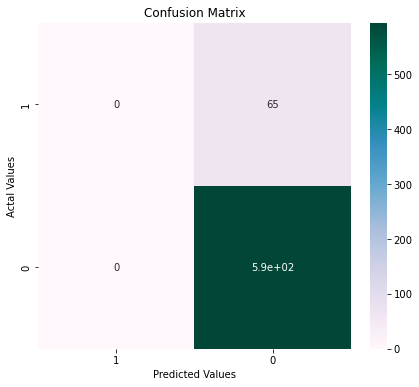

In [26]:
#print confusion matrix
print("\nConfusion matrix of the LogisticRegression classifier:")
predicted_log = classifier_log.predict(x_test)
print(confusion_matrix(y_test,predicted_log))

cm = confusion_matrix(y_test,predicted_log)
cm_df = pd.DataFrame(cm,
                     index = ['1','0'], 
                     columns = ['1','0'])
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:

#print Classification report
print("\nClassification_report of LogisticRegression classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")


Classification_report of LogisticRegression classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.90      1.00      0.95       594

    accuracy                           0.90       659
   macro avg       0.45      0.50      0.47       659
weighted avg       0.81      0.90      0.85       659

----------------------------------------------------------------------------


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [28]:
# Validation methods
#do a 10 fold cross-validation 
results_log = cross_val_score(classifier_log, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_log)


#calcuate the avrage accuracy
print("The average accuracy of the LogisticRegression classifier is : %.2f" % np.mean(results_log))


#print confusion matrix
print("\nConfusion matrix of the LogisticRegression classifier:")
predicted_log = classifier_log.predict(x_test)
print(confusion_matrix(y_test,predicted_log))


#print Classification report
print("\nClassification_report of LogisticRegression classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/num


10-fold cross-validation:
[0.90909091 0.90909091 0.90909091 0.90909091 0.9086758  0.9086758
 0.9086758  0.9086758  0.9086758  0.9086758 ]
The average accuracy of the LogisticRegression classifier is : 0.91

Confusion matrix of the LogisticRegression classifier:
[[  0  65]
 [  0 594]]

Classification_report of LogisticRegression classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.90      1.00      0.95       594

    accuracy                           0.90       659
   macro avg       0.45      0.50      0.47       659
weighted avg       0.81      0.90      0.85       659

----------------------------------------------------------------------------


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [23]:
# calculate the FPR and TPR for all thresholds of the classification

probs = classifier_log.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

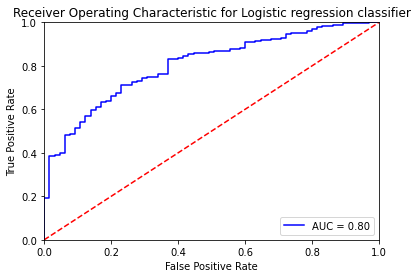

In [15]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logistic regression classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model#2 [Naïve Bayesian]

In [16]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(x_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(x_test.todense(), y_test))

MultinomialNB accuracy: 0.90


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [17]:
#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

#calcuate the avrage accuracy
print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

#print confusion matrix
print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(x_test.todense())
print(confusion_matrix(y_test,predicted_nb))

#print Classification report
print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-


10-fold cross-validation:
[0.90909091 0.90909091 0.90909091 0.90909091 0.9086758  0.9086758
 0.9086758  0.9086758  0.9086758  0.9086758 ]
The average accuracy of the MultinomialNB classifier is : 0.91

Confusion matrix of the MultinomialNB classifier:
[[  0  65]
 [  0 594]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.90      1.00      0.95       594

    accuracy                           0.90       659
   macro avg       0.45      0.50      0.47       659
weighted avg       0.81      0.90      0.85       659

----------------------------------------------------------------------------


C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\ghada\anaconda3\lib\site-

In [18]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_nb.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

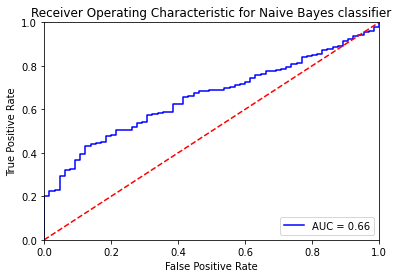

In [19]:
# polt AUC
plt.title('Receiver Operating Characteristic for Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()